In [41]:
import cv2
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import mediapipe as mp


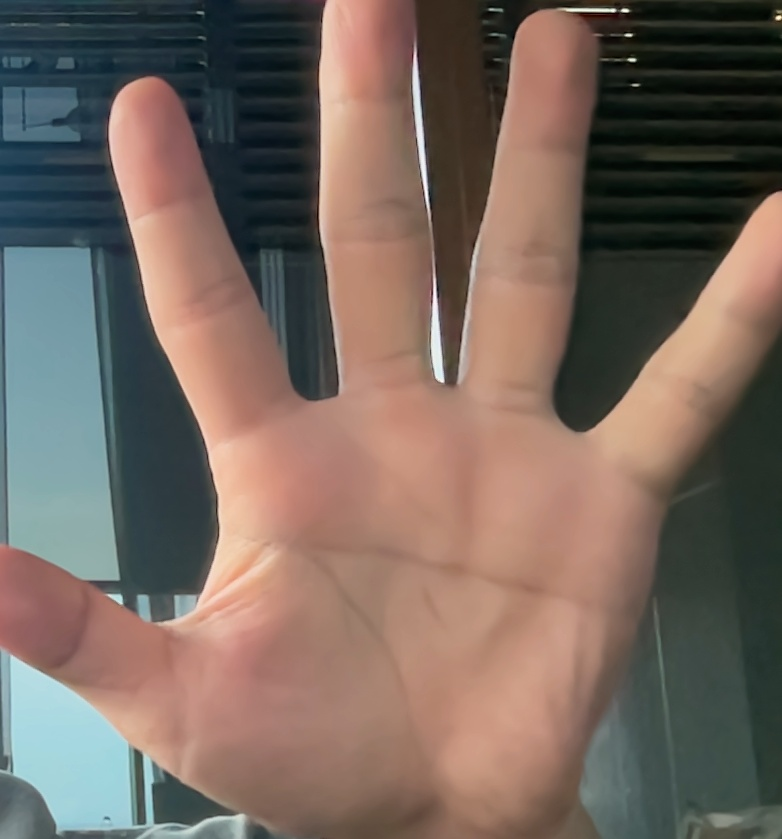

In [42]:
img_read = cv2.imread("./hand_palm.jpg", cv2.IMREAD_GRAYSCALE)
Image(filename='./hand_palm.jpg')

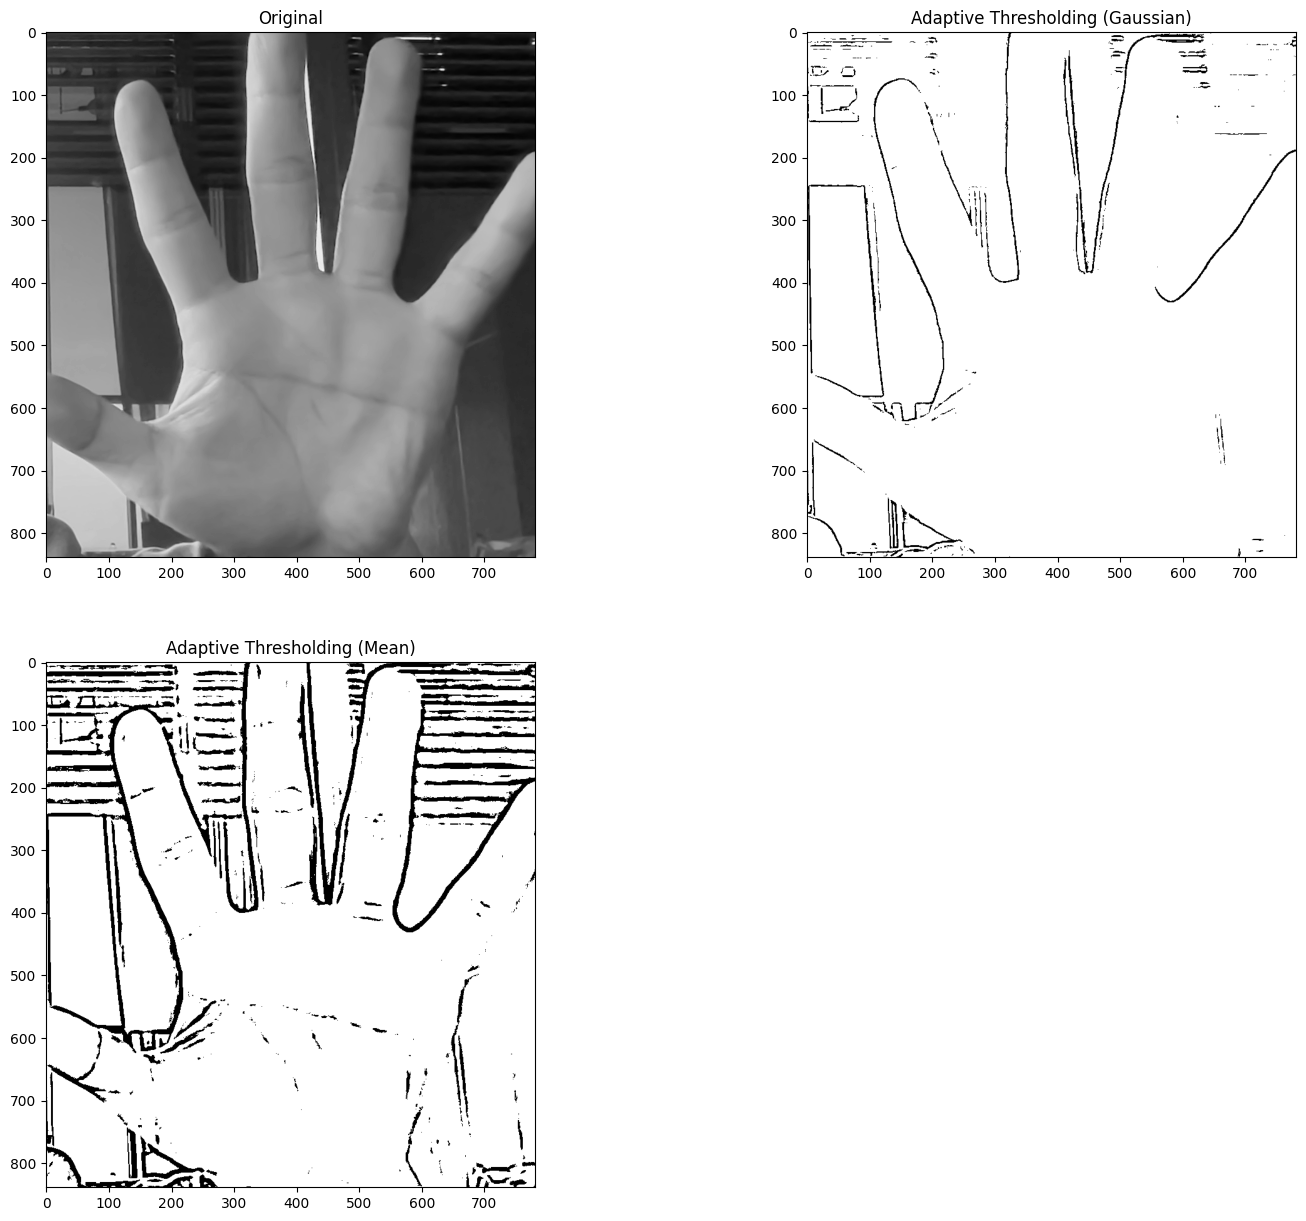

In [43]:
# Perform adaptive thresholding using Gaussian method
img_thresh_adp = cv2.adaptiveThreshold(
    img_read, 
    255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY, 
    11,  # Block size
    7    # Constant C
)

# Perform adaptive thresholding using Mean method
img_thresh_adp_mean = cv2.adaptiveThreshold(
    img_read, 
    255, 
    cv2.ADAPTIVE_THRESH_MEAN_C, 
    cv2.THRESH_BINARY, 
    15,  # Block size
    5    # Constant C
)

# Show the images
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_read,            cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_adp,      cmap="gray");  plt.title("Adaptive Thresholding (Gaussian)");
plt.subplot(223); plt.imshow(img_thresh_adp_mean, cmap="gray");  plt.title("Adaptive Thresholding (Mean)");
plt.show()

In [44]:
change_background_mp = mp.solutions.selfie_segmentation

change_bg_segment = change_background_mp.SelfieSegmentation()

I0000 00:00:1727608065.169191 91995775 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 86), renderer: Apple M2 Pro
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


W0000 00:00:1727608065.172622 92077507 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


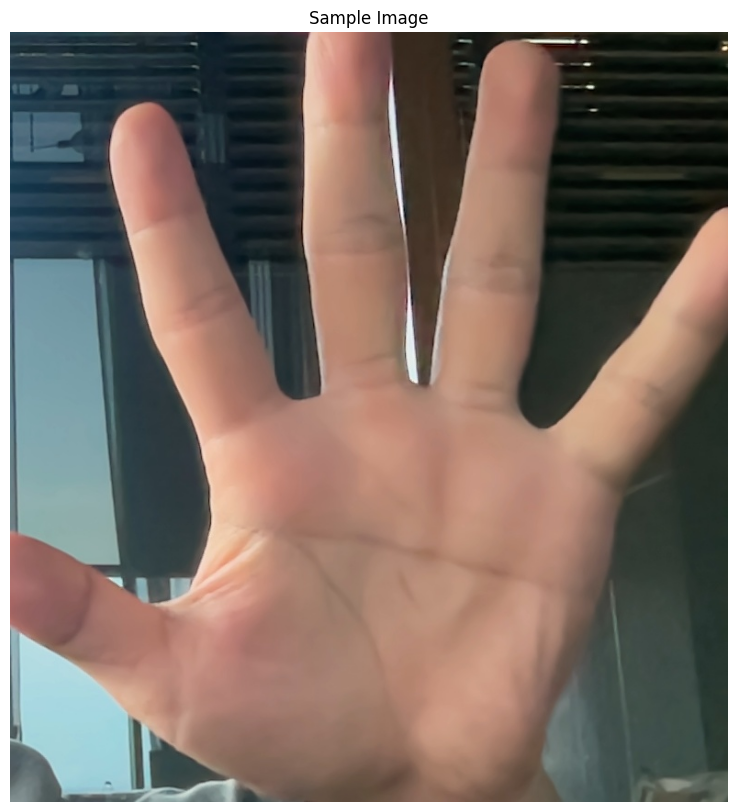

In [45]:
sample_img = cv2.imread('hand_palm.jpg')

plt.figure(figsize = [10, 10])

plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

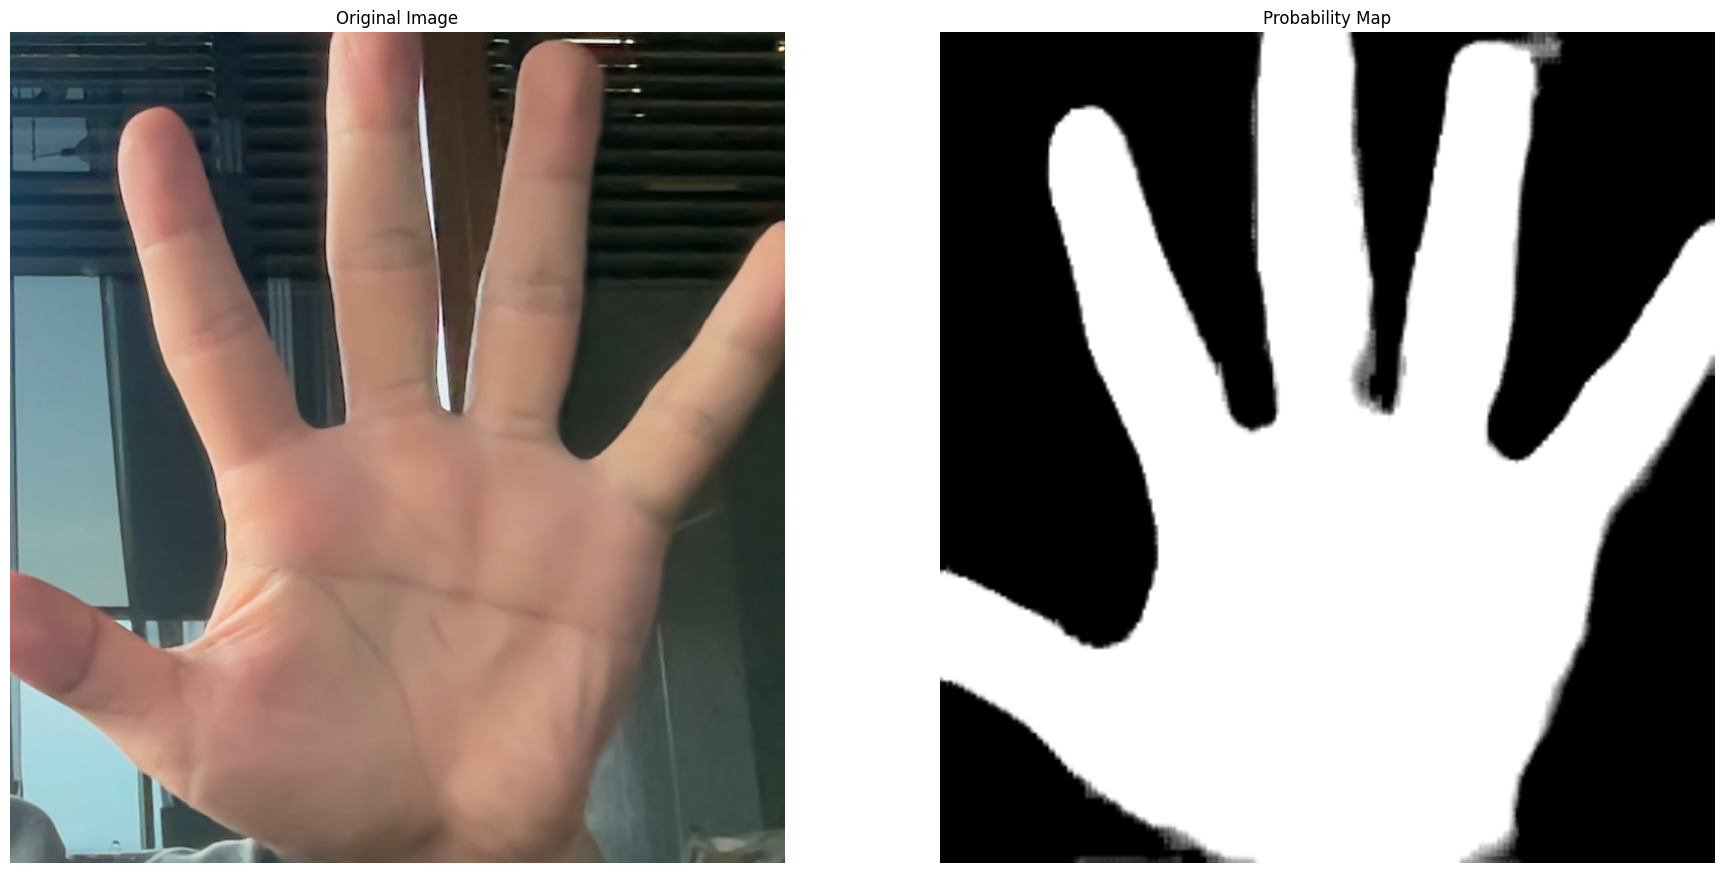

In [46]:
RGB_sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

result = change_bg_segment.process(RGB_sample_img)

plt.figure(figsize=[22,22])
 
plt.subplot(121);plt.imshow(sample_img[:,:,::-1]);plt.title("Original Image");plt.axis('off');
plt.subplot(122);plt.imshow(result.segmentation_mask, cmap='gray');plt.title("Probability Map");plt.axis('off');

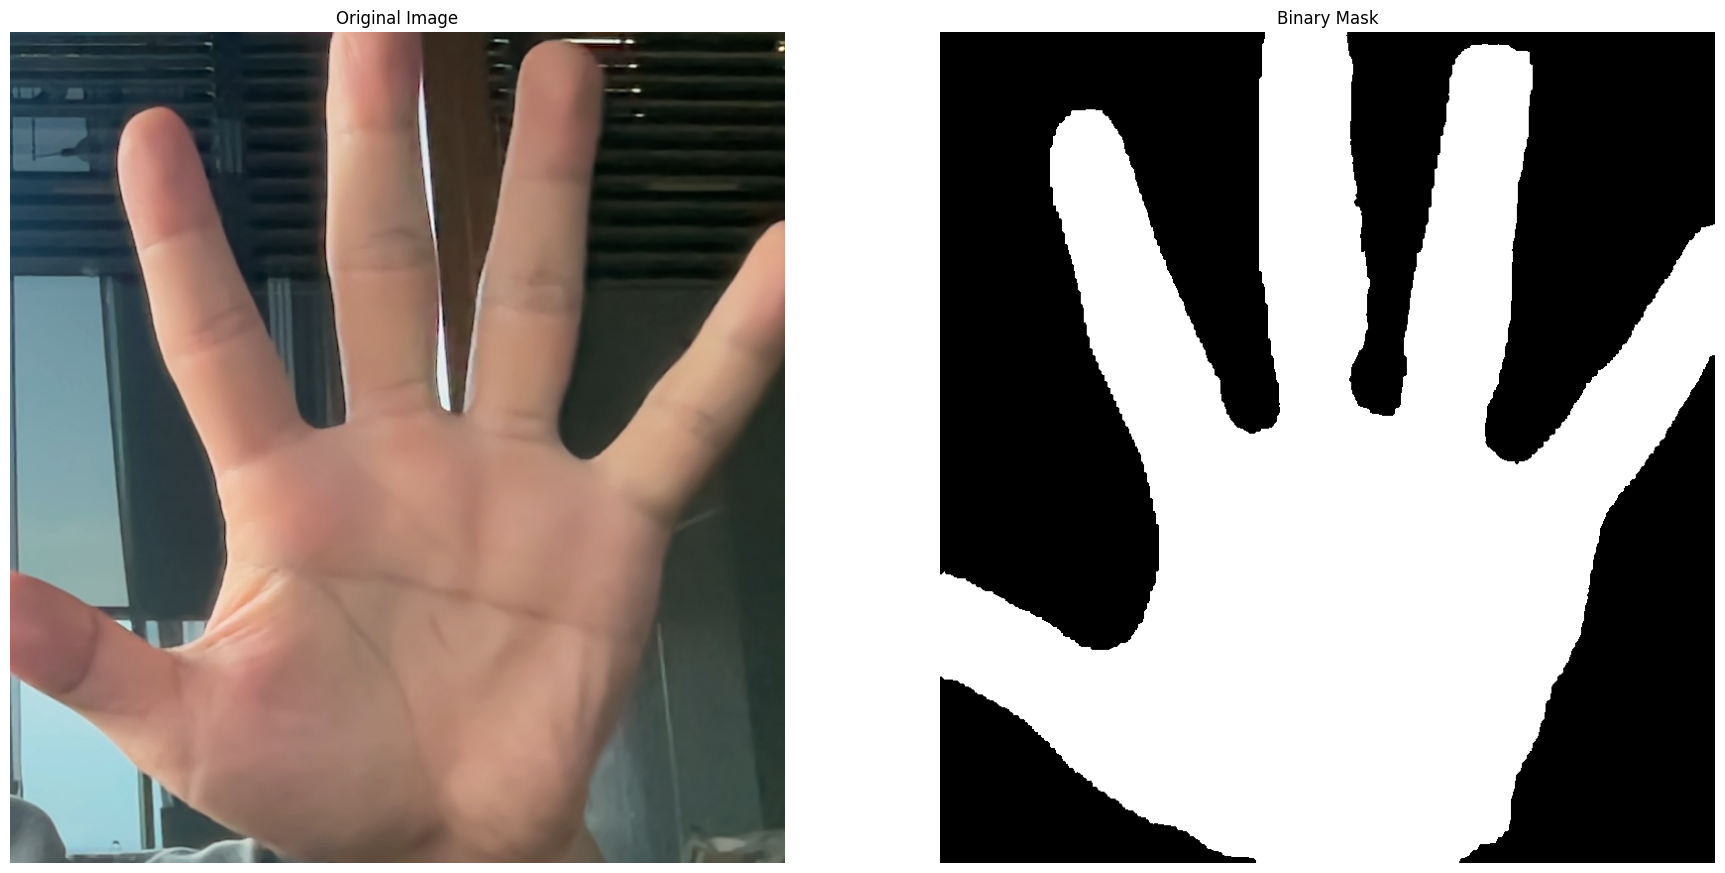

In [47]:
binary_mask = result.segmentation_mask > 0.9

plt.figure(figsize=[22,22])
plt.subplot(121);plt.imshow(sample_img[:,:,::-1]);plt.title("Original Image");plt.axis('off');
plt.subplot(122);plt.imshow(binary_mask, cmap='gray');plt.title("Binary Mask");plt.axis('off');

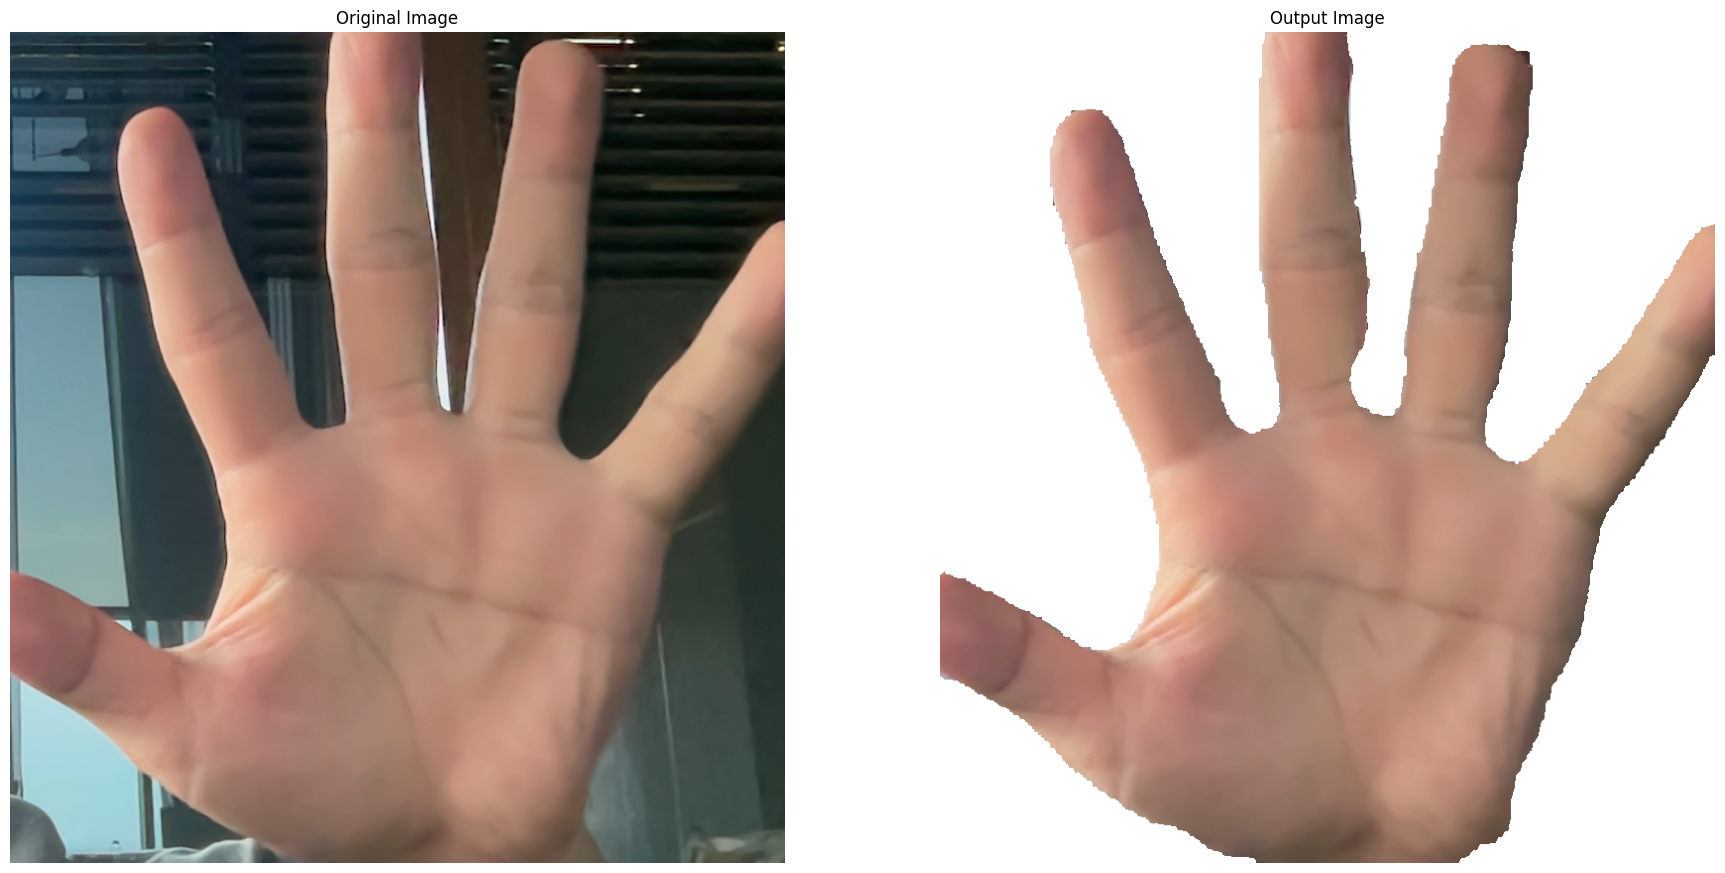

In [48]:
binary_mask_3 = np.dstack((binary_mask,binary_mask,binary_mask))

output_image = np.where(binary_mask_3, sample_img, 255)    

plt.figure(figsize=[22,22])
 
plt.subplot(121);plt.imshow(sample_img[:,:,::-1]);plt.title("Original Image");plt.axis('off');
plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');

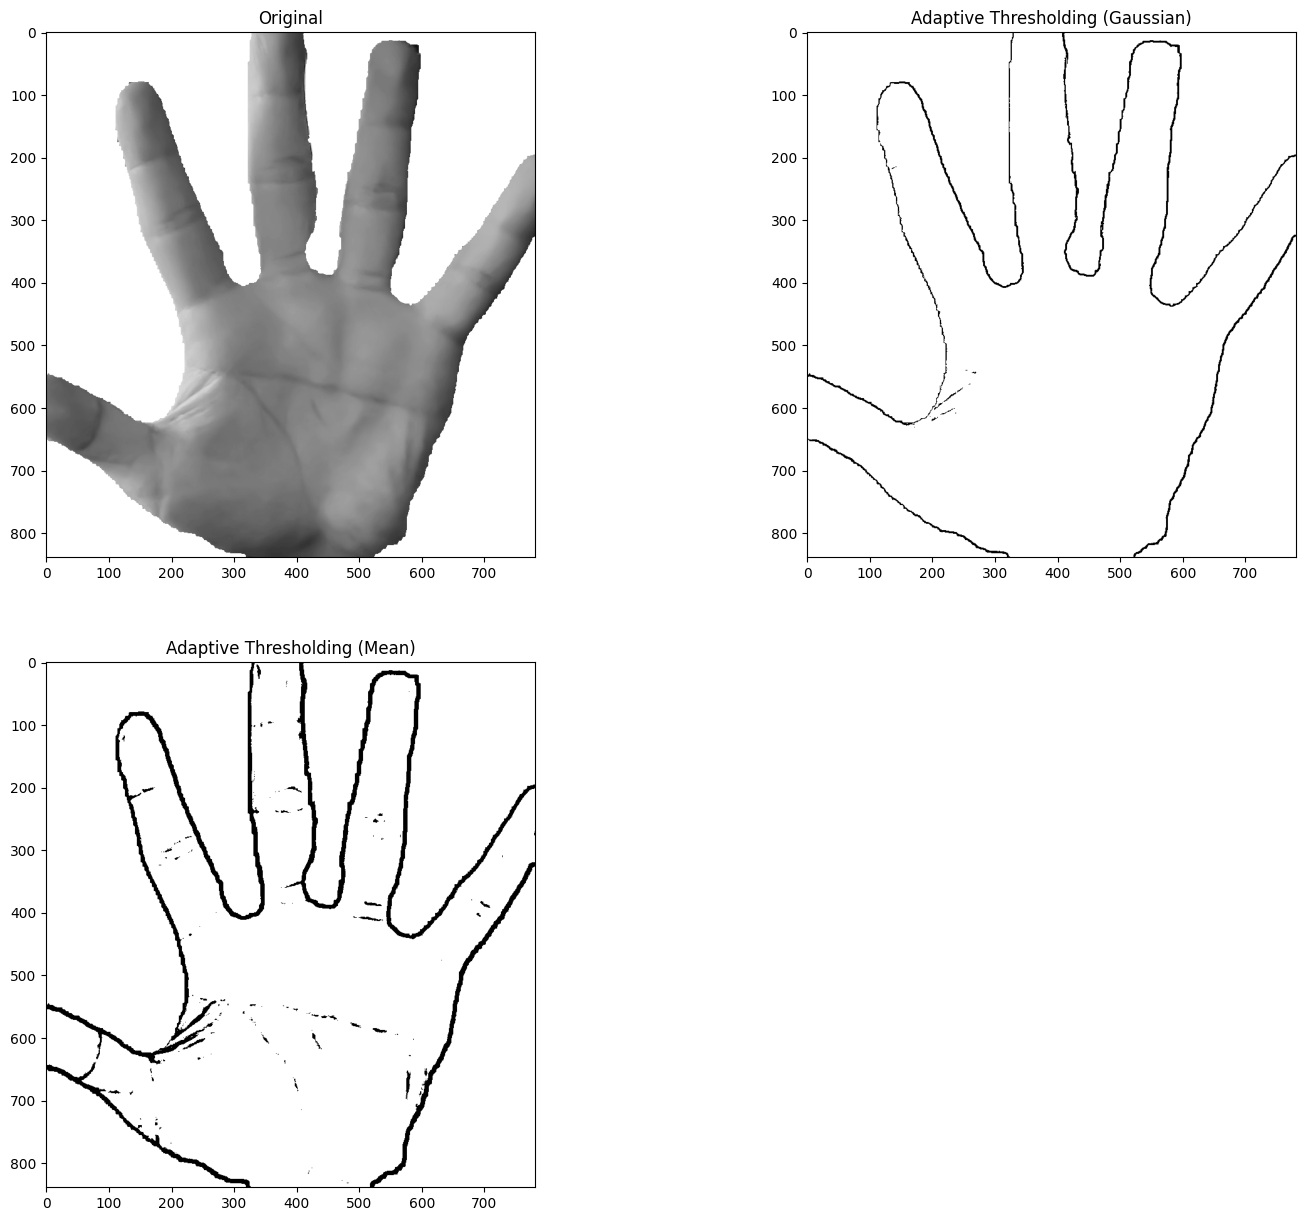

In [50]:
image_gray = cv2.cvtColor(output_image, cv2.COLOR_BGR2GRAY)

# Perform adaptive thresholding using Gaussian method
img_thresh_adp = cv2.adaptiveThreshold(
    image_gray, 
    255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY, 
    11,  # Block size
    7    # Constant C
)

# Perform adaptive thresholding using Mean method
img_thresh_adp_mean = cv2.adaptiveThreshold(
    image_gray, 
    255, 
    cv2.ADAPTIVE_THRESH_MEAN_C, 
    cv2.THRESH_BINARY, 
    15,  # Block size
    5    # Constant C
)

# Show the images
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(image_gray,            cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_adp,      cmap="gray");  plt.title("Adaptive Thresholding (Gaussian)");
plt.subplot(223); plt.imshow(img_thresh_adp_mean, cmap="gray");  plt.title("Adaptive Thresholding (Mean)");
plt.show()